Found 1915 images belonging to 7 classes.
Found 477 images belonging to 7 classes.
Found 70 images belonging to 7 classes.

Classes détectées (train) : {'Bear': 0, 'Camel': 1, 'Chiken': 2, 'Elephent': 3, 'Horse': 4, 'Lion': 5, 'Squirrel': 6}
Nombre de classes (train) : 7
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 14, 14, 256)          196864    ['input_2[0][0]']             
                                                                                                  
 reshape_1 (Reshape)         (None, 196, 256)             0         ['conv2d_1[0][0]']            
                  

c:\Users\Probook\OneDrive\Bureau\DeepLearningTask\myenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 128s 2s/step - loss: 0.1130 - accuracy: 0.1885 - val_loss: 1.9059 - val_accuracy: 0.2117
Epoch 2/40
60/60 [==============================] - 108s 2s/step - loss: 0.1020 - accuracy: 0.2219 - val_loss: 1.8539 - val_accuracy: 0.2285
Epoch 3/40
60/60 [==============================] - 111s 2s/step - loss: 0.0980 - accuracy: 0.2491 - val_loss: 1.7946 - val_accuracy: 0.2516
Epoch 4/40
60/60 [==============================] - 109s 2s/step - loss: 0.0961 - accuracy: 0.2794 - val_loss: 1.7927 - val_accuracy: 0.2537
Epoch 5/40
60/60 [==============================] - 110s 2s/step - loss: 0.0962 - accuracy: 0.2757 - val_loss: 1.9923 - val_accuracy: 0.2725
Epoch 6/40
60/60 [==============================] - 127s 2s/step - loss: 0.0935 - accuracy: 0.3081 - val_loss: 1.7514 - val_accuracy: 0.3270
Epoch 7/40
60/60 [==============================] - 122s 2s/step - loss: 0.0892 - accuracy: 0.3608 - val_loss: 1.8667 - val_accuracy: 0.2998
Epoch 8/40
60/60 [======

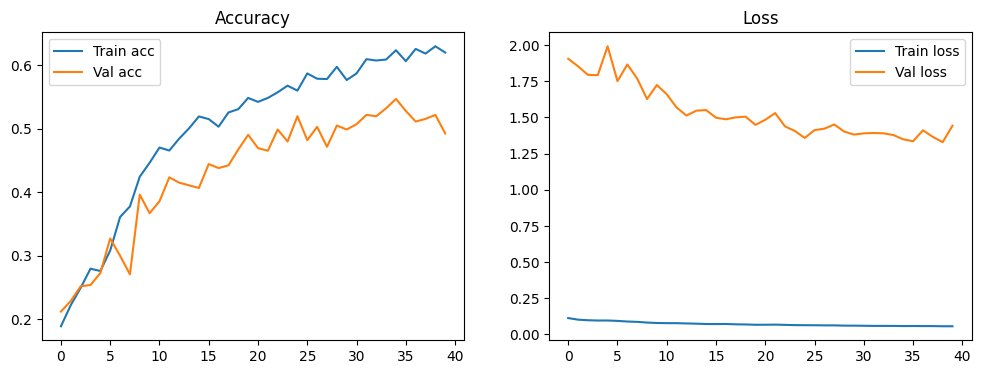


Exemples de prédictions sur la Validation :
CPU: 35.1% | RAM: 81.3%
1/1 [==============================] - 2s 2s/step
Prédiction: Bear | Vérité: Bear
Prédiction: Elephent | Vérité: Bear
Prédiction: Bear | Vérité: Bear

Exemples de prédictions sur le Test :
1/1 [==============================] - 0s 469ms/step
Prédiction: BearTest | Vérité: BearTest
Prédiction: BearTest | Vérité: BearTest
Prédiction: BearTest | Vérité: BearTest


CPU: 3.5% | RAM: 80.5%
CPU: 5.2% | RAM: 83.3%
CPU: 8.2% | RAM: 83.2%
CPU: 9.6% | RAM: 82.8%
CPU: 4.8% | RAM: 82.6%
CPU: 4.1% | RAM: 86.1%
CPU: 15.4% | RAM: 95.3%
CPU: 30.0% | RAM: 95.1%
CPU: 3.8% | RAM: 94.2%
CPU: 1.4% | RAM: 93.9%
CPU: 15.0% | RAM: 91.7%
CPU: 4.4% | RAM: 90.7%
CPU: 3.9% | RAM: 90.0%
CPU: 3.6% | RAM: 90.0%
CPU: 3.1% | RAM: 89.7%
CPU: 3.5% | RAM: 89.5%
CPU: 7.2% | RAM: 91.1%
CPU: 15.9% | RAM: 92.8%
CPU: 8.7% | RAM: 90.0%
CPU: 14.7% | RAM: 90.9%
CPU: 5.5% | RAM: 92.2%
CPU: 22.5% | RAM: 81.6%
CPU: 15.6% | RAM: 85.8%
CPU: 16.1% | RAM: 84.6%
CPU: 49.9% | RAM: 86.5%
CPU: 57.1% | RAM: 85.9%
CPU: 57.6% | RAM: 83.3%
CPU: 57.6% | RAM: 84.6%
CPU: 46.5% | RAM: 83.7%
CPU: 34.9% | RAM: 83.7%
CPU: 46.8% | RAM: 84.5%
CPU: 51.1% | RAM: 83.5%
CPU: 47.9% | RAM: 84.8%
CPU: 55.5% | RAM: 84.0%
CPU: 54.6% | RAM: 83.8%
CPU: 44.7% | RAM: 86.0%
CPU: 68.9% | RAM: 83.1%
CPU: 48.8% | RAM: 83.0%
CPU: 52.5% | RAM: 85.2%
CPU: 56.1% | RAM: 83.9%
CPU: 52.4% | RAM: 83.5%
CPU: 54.7% | RAM: 82.8%
CPU: 61.

In [9]:
import os
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
import psutil
import tensorflow as tf

from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --------------------------------------------------------------------
#                        CONFIGURATION GLOBALE
# --------------------------------------------------------------------
IMG_SIZE = 224
PATCH_SIZE = 16
BATCH_SIZE = 32
EPOCHS = 40

PROJECTION_DIM = 256
NUM_HEADS = 4
TRANSFORMER_LAYERS = 6
MLP_DROPOUT = 0.2
ATTENTION_DROPOUT = 0.1

# Chemins des données
train_dir = r"C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Train"
test_dir = r"C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Test"

NUM_CLASSES = 7  # ex: 7 classes

# Data Augmentation
ROTATION_RANGE    = 20
ZOOM_RANGE        = (0.7, 1.0)
WIDTH_SHIFT       = 0.3
HEIGHT_SHIFT      = 0.3
BRIGHTNESS_RANGE  = (0.8, 1.2)
VALIDATION_SPLIT  = 0.2

# Class weighting (exemple)
class_counts = np.array([346, 353, 346, 337, 355, 340, 315], dtype=np.float32)
class_weights = 1.0 / np.sqrt(class_counts)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# --------------------------------------------------------------------
#                     DATA AUGMENTATION & CHARGEMENT
# --------------------------------------------------------------------
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=ROTATION_RANGE,
    zoom_range=ZOOM_RANGE,
    width_shift_range=WIDTH_SHIFT,
    height_shift_range=HEIGHT_SHIFT,
    brightness_range=BRIGHTNESS_RANGE,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=VALIDATION_SPLIT
)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nClasses détectées (train) :", train_data.class_indices)
print("Nombre de classes (train) :", train_data.num_classes)

# --------------------------------------------------------------------
#              COUCHE CUSTOM POUR LE CLS TOKEN
# --------------------------------------------------------------------
class CLSTokenLayer(layers.Layer):
    def __init__(self, projection_dim, **kwargs):
        super(CLSTokenLayer, self).__init__(**kwargs)
        self.projection_dim = projection_dim

    def build(self, input_shape):
        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, self.projection_dim),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )
        super(CLSTokenLayer, self).build(input_shape)

    def call(self, x):
        batch_size = tf.shape(x)[0]
        cls_tokens = tf.tile(self.cls_token, [batch_size, 1, 1])
        return tf.concat([cls_tokens, x], axis=1)

    def get_config(self):
        config = super(CLSTokenLayer, self).get_config()
        config.update({"projection_dim": self.projection_dim})
        return config

# --------------------------------------------------------------------
#               ARCHITECTURE DU VISION TRANSFORMER
# --------------------------------------------------------------------
def build_vit_model(
    image_size=IMG_SIZE,
    patch_size=PATCH_SIZE,
    num_classes=NUM_CLASSES,
    projection_dim=PROJECTION_DIM,
    transformer_layers=TRANSFORMER_LAYERS,
    num_heads=NUM_HEADS,
    mlp_dropout=MLP_DROPOUT,
    attention_dropout=ATTENTION_DROPOUT
):
    num_patches = (image_size // patch_size) ** 2

    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Patch Embedding
    x = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding='valid'
    )(inputs)
    x = layers.Reshape((num_patches, projection_dim))(x)

    # CLS Token
    x = CLSTokenLayer(projection_dim)(x)

    # Position Embedding
    positions = layers.Embedding(
        input_dim=num_patches + 1,
        output_dim=projection_dim
    )(tf.range(start=0, limit=num_patches + 1))
    positions = tf.expand_dims(positions, axis=0)
    x = x + positions

    # Dropout initial
    x = layers.Dropout(0.1)(x)

    # Transformer blocks
    for _ in range(transformer_layers):
        # a) LayerNorm + Self-Attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim // num_heads,
            dropout=attention_dropout
        )(x1, x1)
        x = x + attn_output

        # b) MLP
        x2 = layers.LayerNormalization(epsilon=1e-6)(x)
        x2 = layers.Dense(projection_dim * 2, activation='gelu')(x2)
        x2 = layers.Dropout(mlp_dropout)(x2)
        x2 = layers.Dense(projection_dim)(x2)
        x = x + x2

    # Classification : token CLS
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    cls_token_final = layers.Lambda(lambda t: t[:, 0])(x)

    outputs = layers.Dense(num_classes, activation='softmax')(cls_token_final)
    return models.Model(inputs, outputs)

model = build_vit_model()
model.summary()

# --------------------------------------------------------------------
#      COMPILATION AVEC COSINE DECAY + ADAMW + CLIPNORM
# --------------------------------------------------------------------
steps_per_epoch = len(train_data)
total_steps = steps_per_epoch * EPOCHS
initial_lr = 3e-4

# Cosine Decay
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=total_steps,
    alpha=0.0
)

optimizer = tf.keras.optimizers.experimental.AdamW(
    learning_rate=lr_schedule,
    weight_decay=0.03,
    clipnorm=1.0
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# --------------------------------------------------------------------
#                    CALLBACKS & SURVEILLANCE CPU
# --------------------------------------------------------------------import os
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
import psutil
import tensorflow as tf

from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --------------------------------------------------------------------
#                        CONFIGURATION GLOBALE
# --------------------------------------------------------------------
IMG_SIZE = 224
PATCH_SIZE = 16
BATCH_SIZE = 32
EPOCHS = 40

PROJECTION_DIM = 256
NUM_HEADS = 4
TRANSFORMER_LAYERS = 6
MLP_DROPOUT = 0.2
ATTENTION_DROPOUT = 0.1

# Chemins des données
train_dir = r"C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Train"
test_dir = r"C:\Users\Probook\OneDrive\Bureau\DeepLearningTask\DeepLearningTask-1\DeepLearning 24-25\Test"

NUM_CLASSES = 7  # ex: 7 classes

# Data Augmentation
ROTATION_RANGE    = 20
ZOOM_RANGE        = (0.7, 1.0)
WIDTH_SHIFT       = 0.3
HEIGHT_SHIFT      = 0.3
BRIGHTNESS_RANGE  = (0.8, 1.2)
VALIDATION_SPLIT  = 0.2

# Class weighting (exemple)
class_counts = np.array([346, 353, 346, 337, 355, 340, 315], dtype=np.float32)
class_weights = 1.0 / np.sqrt(class_counts)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# --------------------------------------------------------------------
#                     DATA AUGMENTATION & CHARGEMENT
# --------------------------------------------------------------------
train_data_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=ROTATION_RANGE,
    zoom_range=ZOOM_RANGE,
    width_shift_range=WIDTH_SHIFT,
    height_shift_range=HEIGHT_SHIFT,
    brightness_range=BRIGHTNESS_RANGE,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=VALIDATION_SPLIT
)
test_data_gen = ImageDataGenerator(rescale=1.0/255)

train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("\nClasses détectées (train) :", train_data.class_indices)
print("Nombre de classes (train) :", train_data.num_classes)

# --------------------------------------------------------------------
#              COUCHE CUSTOM POUR LE CLS TOKEN
# --------------------------------------------------------------------
class CLSTokenLayer(layers.Layer):
    def __init__(self, projection_dim, **kwargs):
        super(CLSTokenLayer, self).__init__(**kwargs)
        self.projection_dim = projection_dim

    def build(self, input_shape):
        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, self.projection_dim),
            initializer=tf.keras.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )
        super(CLSTokenLayer, self).build(input_shape)

    def call(self, x):
        batch_size = tf.shape(x)[0]
        cls_tokens = tf.tile(self.cls_token, [batch_size, 1, 1])
        return tf.concat([cls_tokens, x], axis=1)

    def get_config(self):
        config = super(CLSTokenLayer, self).get_config()
        config.update({"projection_dim": self.projection_dim})
        return config

# --------------------------------------------------------------------
#               ARCHITECTURE DU VISION TRANSFORMER
# --------------------------------------------------------------------
def build_vit_model(
    image_size=IMG_SIZE,
    patch_size=PATCH_SIZE,
    num_classes=NUM_CLASSES,
    projection_dim=PROJECTION_DIM,
    transformer_layers=TRANSFORMER_LAYERS,
    num_heads=NUM_HEADS,
    mlp_dropout=MLP_DROPOUT,
    attention_dropout=ATTENTION_DROPOUT
):
    num_patches = (image_size // patch_size) ** 2

    inputs = layers.Input(shape=(image_size, image_size, 3))

    # Patch Embedding
    x = layers.Conv2D(
        filters=projection_dim,
        kernel_size=patch_size,
        strides=patch_size,
        padding='valid'
    )(inputs)
    x = layers.Reshape((num_patches, projection_dim))(x)

    # CLS Token
    x = CLSTokenLayer(projection_dim)(x)

    # Position Embedding
    positions = layers.Embedding(
        input_dim=num_patches + 1,
        output_dim=projection_dim
    )(tf.range(start=0, limit=num_patches + 1))
    positions = tf.expand_dims(positions, axis=0)
    x = x + positions

    # Dropout initial
    x = layers.Dropout(0.1)(x)

    # Transformer blocks
    for _ in range(transformer_layers):
        # a) LayerNorm + Self-Attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(x)
        attn_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=projection_dim // num_heads,
            dropout=attention_dropout
        )(x1, x1)
        x = x + attn_output

        # b) MLP
        x2 = layers.LayerNormalization(epsilon=1e-6)(x)
        x2 = layers.Dense(projection_dim * 2, activation='gelu')(x2)
        x2 = layers.Dropout(mlp_dropout)(x2)
        x2 = layers.Dense(projection_dim)(x2)
        x = x + x2

    # Classification : token CLS
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    cls_token_final = layers.Lambda(lambda t: t[:, 0])(x)

    outputs = layers.Dense(num_classes, activation='softmax')(cls_token_final)
    return models.Model(inputs, outputs)

model = build_vit_model
def monitor_cpu():
    while True:
        usage = psutil.cpu_percent()
        mem = psutil.virtual_memory().percent
        print(f"CPU: {usage}% | RAM: {mem}%")
        time.sleep(60)

threading.Thread(target=monitor_cpu, daemon=True).start()

my_callbacks = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_accuracy'),
    callbacks.ModelCheckpoint('best_vit.h5', save_best_only=True, monitor='val_accuracy')
]

# --------------------------------------------------------------------
#                       ENTRAÎNEMENT
# --------------------------------------------------------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_steps=len(val_data),
    class_weight=class_weights_dict, 
    callbacks=my_callbacks,
    verbose=1  # pour voir val_loss, val_accuracy, etc. à chaque epoch
)

best_val_acc = max(history.history['val_accuracy'])
print(f"\nMeilleure val_accuracy pendant l'entraînement : {best_val_acc:.2%}")

# --------------------------------------------------------------------
#             RÉCUPÉRER LE MEILLEUR MODÈLE & ÉVALUER
# --------------------------------------------------------------------
print("\nChargement des meilleurs poids (best_vit.h5) ...")
model.load_weights('best_vit.h5')

print("\nÉvaluation finale sur la Validation :")
val_loss, val_acc = model.evaluate(val_data)
print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_acc:.2%}")

print("\nÉvaluation finale sur le Test :")
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.2%}")

# --------------------------------------------------------------------
#                       GRAPHIQUES
# --------------------------------------------------------------------
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.legend()

plt.show()

# --------------------------------------------------------------------
#       EXEMPLES DE PRÉDICTIONS SUR VAL_DATA & TEST_DATA
# --------------------------------------------------------------------
inv_map_val = {v: k for k, v in val_data.class_indices.items()}
print("\nExemples de prédictions sur la Validation :")
for images, labels in val_data:
    preds = model.predict(images)
    for i in range(min(3, len(images))):
        true_cls = inv_map_val[np.argmax(labels[i])]
        pred_cls = inv_map_val[np.argmax(preds[i])]
        print(f"Prédiction: {pred_cls} | Vérité: {true_cls}")
    break

inv_map_test = {v: k for k, v in test_data.class_indices.items()}
print("\nExemples de prédictions sur le Test :")
for images, labels in test_data:
    preds = model.predict(images)
    for i in range(min(3, len(images))):
        true_cls = inv_map_test[np.argmax(labels[i])]
        pred_cls = inv_map_test[np.argmax(preds[i])]
        print(f"Prédiction: {pred_cls} | Vérité: {true_cls}")
    break
